/tmp/ipykernel_19/281021095.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_19/281021095.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Data cleaning is complete and verified.

Generating correlation heatmap...


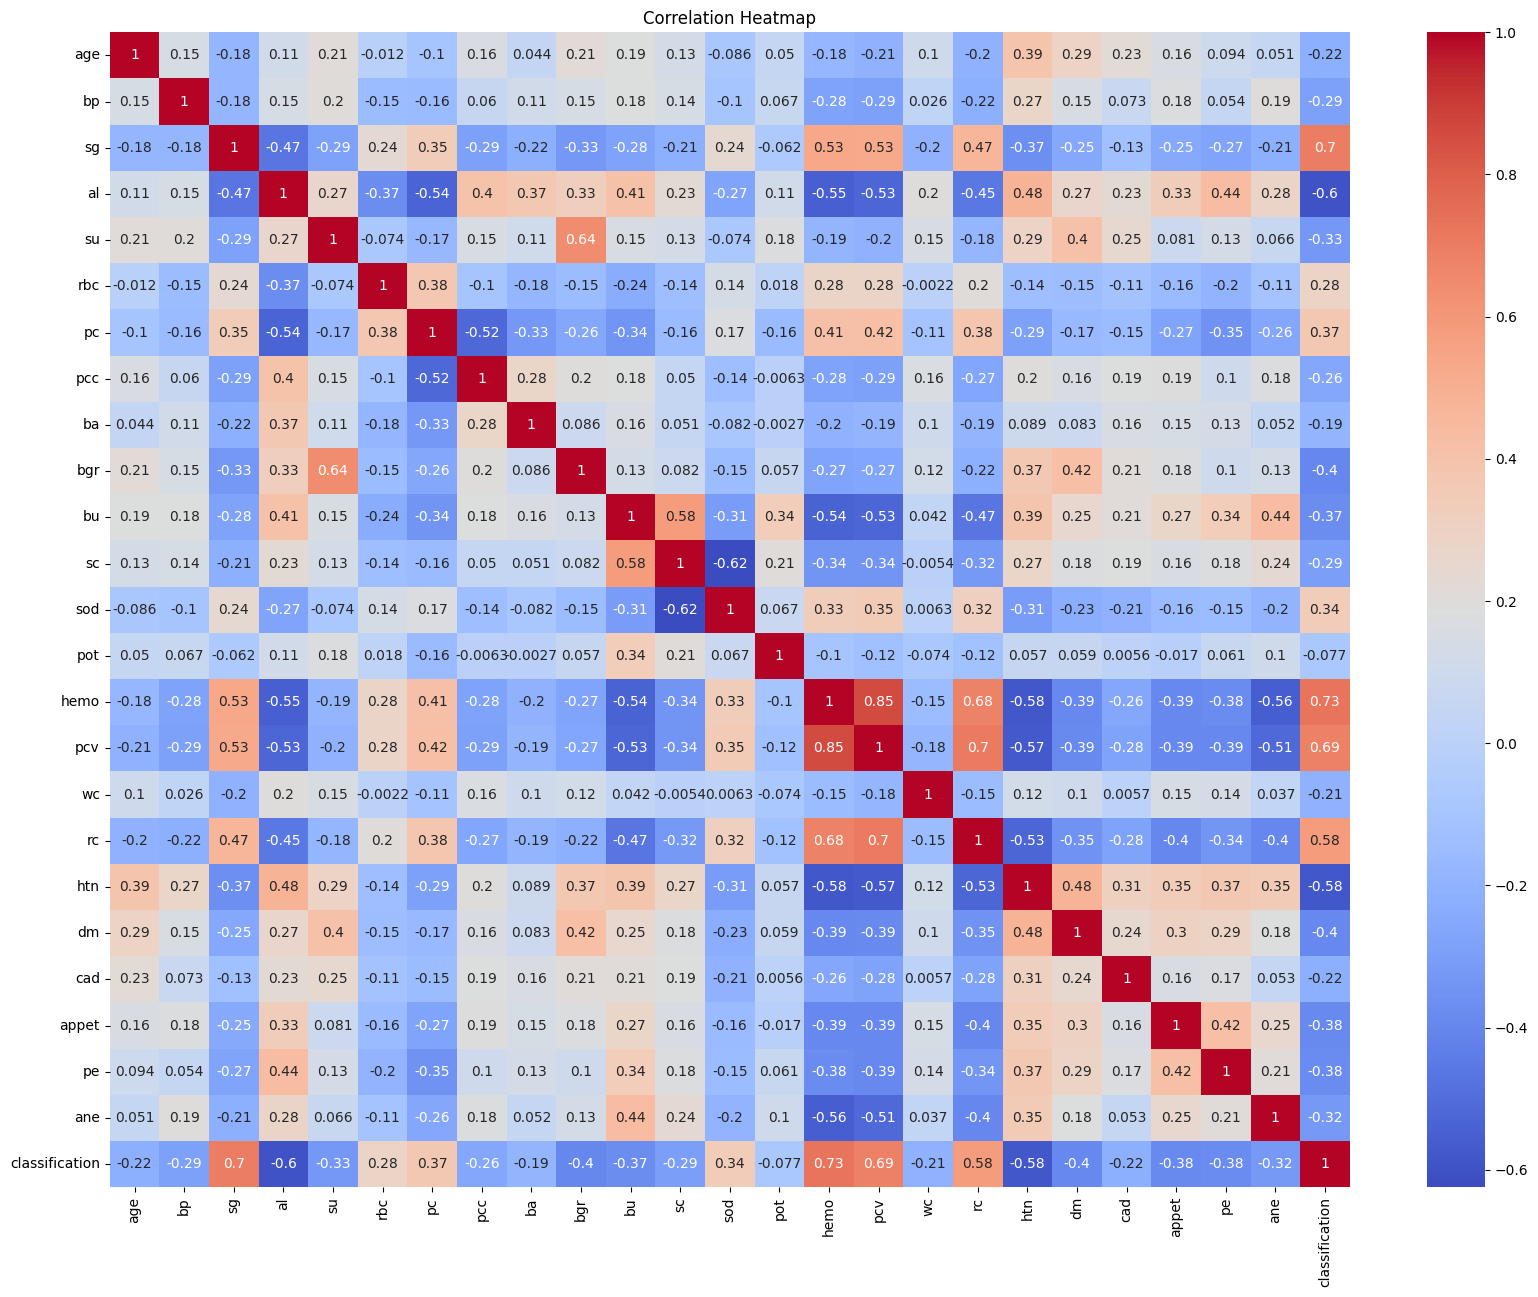


Data successfully split for training and testing.

--- Training Random Forest Classifier ---
Random Forest Accuracy: 1.0000

Model training complete. Model saved successfully as 'ckd_model.pkl'


In [1]:
# --- 1. All Necessary Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# --- 2. Load and Clean Data ---
# We explicitly tell pandas that '?' should be treated as a missing value (NaN)
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv', na_values='?')
df.drop('id', axis=1, inplace=True, errors='ignore')

numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

assert df.isnull().sum().sum() == 0, "Error: Missing values still exist!"
print("Data cleaning is complete and verified.")

# --- 3. Visualization ---
print("\nGenerating correlation heatmap...")
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- 4. Prepare Data for Modeling ---
X = df.drop('classification', axis=1)
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData successfully split for training and testing.")

# --- 5. Train and Evaluate Models ---
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# --- 6. Save the Final Model ---
filename = 'ckd_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"\nModel training complete. Model saved successfully as '{filename}'")